In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("notebook",font_scale=1.2)

Scientific figures often contain multiple plots to make a point. Also while doing data analysis it makes sense to combine multiple plots into one figure. In matplotlib, this is acchieved with *subplots*. 

# Basic subplot syntax

Subplots are generated with the command `plt.subplots(nrow,ncol)` command, which returns a `figure` and a list of axes:

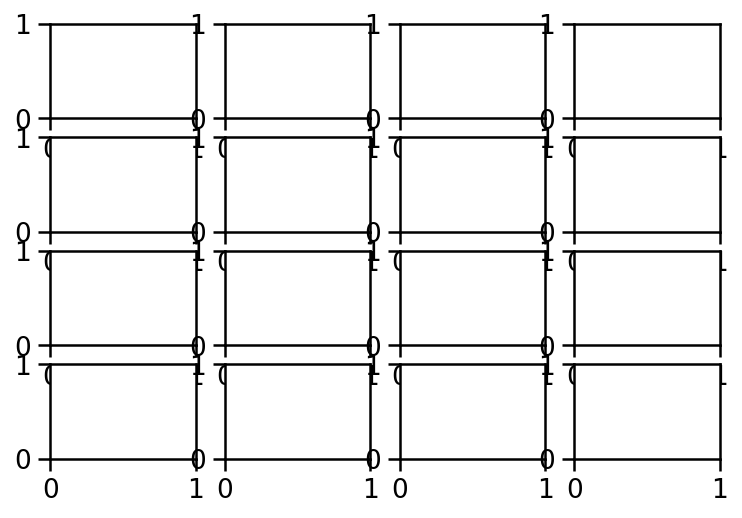

In [2]:
fig, axes = plt.subplots(4,4)

You may notice that this doesn't look nice; the plots are tiny and the ticks overlap. To fix the overlap, we call the command `plt.tight_layout()`:

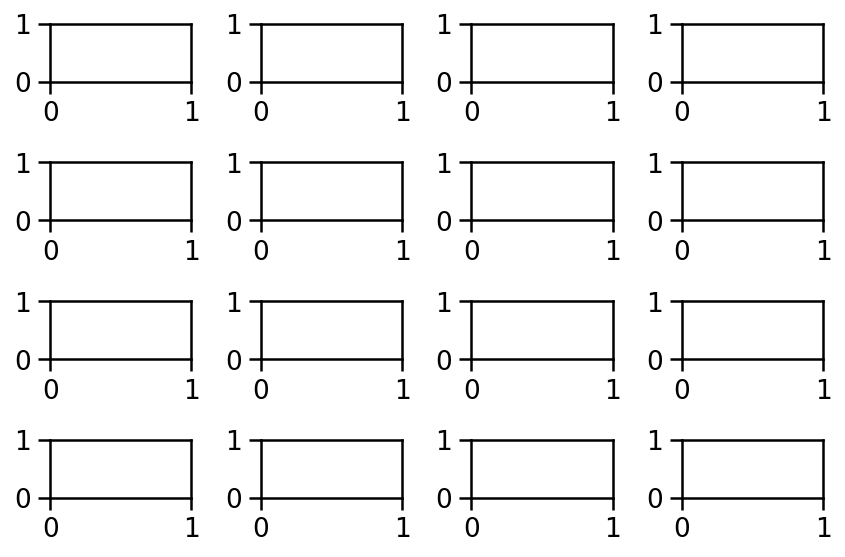

In [3]:
fig, axes = plt.subplots(4,4)
plt.tight_layout()

This command adds some whitespace, but it makes the plots even smaller. This happens because the size of the figure is fixed, so the only way to add whitespace is to make the plots smaller. 

As with `plt.figure`, `plt.subplots` has the option `figsize` to set the figure size. Use the `figsize` option to increase the figure size such that the plots have a decent size.

In [4]:
# change size of the plots

You may have data that has similar x- or y-axes. Look in the documentation of `plt.subplots` to find out how to share x- and/or y-axes:

In [5]:
# share x and/or y-axes

# Populating subplots

When you create a figure with subplots you have a figure object and one axis object for each subplot. These axis objects are similar to the ones we created with `ax = plt.gca()`. Hence, to populate a subplot we need to get the axis object for the subplot we want to populate. Running `fig,axes = plt.subplots(nrow,ncol)` you get a figure and:
* a 2D array with axes if `nrow > 1` and `ncol > 1`;
* a 1D array otherwise if `nrow > 1` or `ncol > `;
* an axes object if `nrow = ncol = 1`.

So, the first subplot is:
* `axes[0,0]` if `nrow > 1` and `ncol > 1`;
* `axes[0]` if `nrow > 1` or `ncol > `;
* `axes` if `nrow = ncol = 1`.

Create a 2x2 subplot and give each subplot a title that describes its position, e.g. top left.

In [6]:
# create subplots with titles

Now, create a 2x2 subplot and fill it with the following plots:
* top left: $y = e^x$ (already done)
* top right: $y = x^2$
* bottom left: $y = 2x$ with errorbars of $y_\text{err} = .2x$
* bottom right: $y = \sin(x)$ as a bar chart

Add labels and titles to each plot.

In [7]:
# fill plots

Repeat the previous exercise, but now with for plots in a row (or a column, whatever you like).

In [8]:
# make subplot row (or column)

# Advanced subplots

In the previous exercise we populated the subplots *by hand*. This is required quite some lines of code, which means that it is a lot of work and there is a lot of space for mistakes. It is however possible to automate a large part of filling in the subplots, especially when you are plotting data that is neatly organized in, for example, a pandas DataFrame. And that is what we will do in this exercise. 

Some general hints for this exercise:
* for loop
```
for item in ['a','b']:
    print(item)
```
* foor loop with index and item:
```
for i,item in enumerate(['a','b']):
    print(i,item)
```
* creating strings: `'{} {}'.format(part1,part2)`
* unique items in a pandas column: `df[col].unique()`
* selecting rows from a DataFrame: `sdf = df[(df['colA']==x)&(df['colB']==y)]`

Before we start, we load a suitable dataset; the *fmri* dataset. This set contains time course data from multiple subjects measured in different regions and for different events. Before continuing to the next step, have a look at the dataset.

In [9]:
df = sns.load_dataset("fmri")
display(df.columns)

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')

## Set up single plot

### Plot mean

Before we start with creating multiple plots, we create the plot for a single condition. Select the rows from `df` for which the event is `stim` and the region is `frontal` and store this in a variable:

In [10]:
# sdf = df[...]

Use `groupby` to compute the mean and standard deviation of the signal in the `frontal` region for the event `stim` and store the results as variables.

In [11]:
# mu = 
# sd = 

Next, plot the mean signal level with the standard deviation as error bars against time. Note that for `x = df.groupby('col').mean()`, `x.index` will return the `col`.

In [12]:
# plot signal level with standard deviation over time

As you see there are two events: `cue` and `stim`; and two regions: `frontal` and `parietal`. If we wanted to have a plot for each event-region combination, we would need four subplots. To start, make a 2x2 subplot with decent size subplots, and make sure the plots do not overlap.

### Plot per subject

It may be more interesting to plot the results per subject. Use a for loop to create a single plot for event = `stim` and region = `frontal` with one per subject.

In [13]:
# plot signal for all subjects

### Plot mean and subject data

Combine the two plots above in a single plot with a dot for each observation and a solid line for the sd. As you are plotting all the data, you can leave out the error bars.  Make sure that the markers are not too big.

In [14]:
# plot mean as a line
# plot individual observations as dots

## Automate accessing subplots

Create a 2x2 subplot, and make sure the the subplots are not too small.

In [15]:
# create 2x2 subplot

Next, we will automate filling in the plots. Use for loops to iterate over the axes and set the correct title, i.e. event - region, for each plot. 

In [16]:
# use for loops to automatically set titles (event - region)

## Automatically add plots to subplots

You have create a plot for a single event - region combination and automated accessing the subplots. Now, combine the two to fill all the subplots, and add labels to the axes.

In [17]:
# Complex subplot

We are losing quite some space to the axes labels. Are there any axes that could be shared among the subplots? If so, implement that and make sure there are no labels at those axes.

In [18]:
# make previous plot more space efficient